# Predicting GitHub Issue Lifetimes
Atuhaire Ambala, Andrew Millam, and Jonathan Rivas  
Grand Canyon University  
CST-440  
Professor Fabio Marcos De Abreu Santos  
April 28, 2024

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("issue_data_sna.csv")
df['Issue Lifetime (hours)'] = None
df['Issue Lifetime'] = None

print(df.shape)
df.head()

(2986, 14)


,Repository,Open Date,Closed Date,author,Issue Title,Issue Body,Comment Bodies,Comment Authors,Number of Comments,Labels,PR Number,PR Merge Date,Issue Lifetime (hours),Issue Lifetime
0,repository0,2024-04-01T21:54:12Z,2024-04-05T06:49:34Z,CoolHandLouis,"Enhancement Request: For MacOS, add text that ...",### Is your feature request related to a probl...,I'll add my two cents here. I think we should ...,bbsmooth|SEPARATOR|Sembauke|SEPARATOR|Rabberpoli,3,"help wanted, other: device specific, scope: UI...",54276,2024-04-05T06:49:33Z,None,None
1,repository0,2024-03-29T18:41:42Z,2024-03-29T23:30:19Z,friendlyseal,Typo on Step 61 of Sudoku Solver project in Sc...,Typo on Step 61 of Sudoku Solver project in Sc...,Thanks for opening this issue.\r\n\r\nThis loo...,gikf,1,"type: bug, scope: curriculum, first timers onl...",54253,2024-03-29T23:30:18Z,None,None
2,repository0,2024-03-29T16:10:16Z,2024-03-29T20:27:53Z,huyenltnguyen,[The Odin Project] Typo in Working With Text Q...,## Description\r\n\r\nThe description of Worki...,This issue is open to first-time code contribu...,huyenltnguyen,1,"type: bug, scope: curriculum, first timers onl...",54251,2024-03-29T20:27:52Z,None,None
3,repository0,2024-03-29T14:29:51Z,2024-04-04T05:40:31Z,ahmaxed,Google Pay displays wrong amount,### Describe the Issue\r\n\r\nIf any amount ot...,"Yep, just tried with another import (40$) and ...",Rabberpoli|SEPARATOR|Raghul-V|SEPARATOR|Rabber...,5,"type: bug, help wanted, status: waiting triage",54281,2024-04-04T05:40:30Z,None,None
4,repository0,2024-03-27T17:33:53Z,2024-04-01T17:19:08Z,samGreer,Unclear instruction: Learn String Manipulation...,### Describe the Issue\n\nThe second paragraph...,"Hi @samGreer I do not see the word ""parenthese...",zairahira|SEPARATOR|Dario-DC|SEPARATOR|Rabberp...,6,"type: bug, help wanted, scope: curriculum, new...",54267,2024-04-01T17:19:07Z,None,None


# Preprocessing Steps

### Calculate difference between merge and open date in hours

In [3]:
month_days = {
    1: 31,  # January
    2: 28,  # February
    3: 31,  # March
    4: 30,  # April
    5: 31,  # May
    6: 30,  # June
    7: 31,  # July
    8: 31,  # August
    9: 30,  # September
    10: 31,  # October
    11: 30,  # November
    12: 31   # December
}


def to_numerical(timestamp):
    # Splitting the timestamp into individual components
    date_time = timestamp.split("T")
    date_components = date_time[0].split("-")
    time_components = date_time[1].rstrip("Z").split(":")

    # Converting components to integers
    year = int(date_components[0])
    month = int(date_components[1])
    day = int(date_components[2])
    hour = int(time_components[0])
    minute = int(time_components[1])
    second = int(time_components[2])

    # Putting each number into a list
    number_list = [year, month, day, hour, minute, second]

    return(number_list)

def calculate_time_difference(open_date, merged_date):
    if merged_date[1] != open_date[1]:
        day_difference = (merged_date[2]) + (month_days[open_date[1]] - open_date[2])

        if day_difference == 1:
            time_difference = (24 - open_date[3]) + (merged_date[3])

        else:
            extra_days = (day_difference - 1) * 24
            time_difference = (24 - open_date[3]) + (merged_date[3]) + (extra_days)


    elif merged_date[2] > open_date[2]:
        day_difference = merged_date[2] - open_date[2]

        if day_difference == 1:
            time_difference = (24 - open_date[3]) + (merged_date[3])

        else:
            extra_days = (day_difference - 1) * 24
            time_difference = (24 - open_date[3]) + (merged_date[3]) + (extra_days)

    elif merged_date[3] > open_date[3]:
        time_difference = merged_date[3] - open_date[3]

    else:
        time_difference = 0

    print(time_difference)
    print()
    return time_difference


for index, row in df.iterrows():
    open_date_string = row['Open Date']
    merged_date_string = row['PR Merge Date']

    open_date = to_numerical(open_date_string)
    merged_date = to_numerical(merged_date_string)

    print(merged_date)
    print(open_date)

    df.loc[index, 'Issue Lifetime (hours)'] = calculate_time_difference(open_date, merged_date)

df.head()

[2024, 4, 5, 6, 49, 33]
[2024, 4, 1, 21, 54, 12]
81

[2024, 3, 29, 23, 30, 18]
[2024, 3, 29, 18, 41, 42]
5

[2024, 3, 29, 20, 27, 52]
[2024, 3, 29, 16, 10, 16]
4

[2024, 4, 4, 5, 40, 30]
[2024, 3, 29, 14, 29, 51]
135

[2024, 4, 1, 17, 19, 7]
[2024, 3, 27, 17, 33, 53]
120

[2024, 4, 3, 1, 29, 4]
[2024, 3, 26, 16, 59, 55]
177

[2024, 3, 27, 14, 39, 31]
[2024, 3, 26, 10, 2, 47]
28

[2024, 3, 26, 18, 4, 23]
[2024, 3, 26, 6, 19, 25]
12

[2024, 3, 25, 14, 57, 14]
[2024, 3, 25, 13, 18, 57]
1

[2024, 3, 26, 10, 4, 34]
[2024, 3, 24, 3, 5, 30]
55

[2024, 3, 26, 10, 2, 35]
[2024, 3, 22, 16, 36, 50]
90

[2024, 4, 3, 5, 1, 38]
[2024, 3, 21, 16, 20, 9]
301

[2024, 4, 1, 15, 38, 19]
[2024, 3, 21, 1, 49, 47]
278

[2024, 3, 28, 9, 14, 21]
[2024, 3, 20, 22, 11, 57]
179

[2024, 3, 19, 13, 31, 0]
[2024, 3, 17, 1, 15, 2]
60

[2024, 3, 21, 15, 9, 48]
[2024, 3, 16, 23, 33, 6]
112

[2024, 3, 18, 17, 17, 27]
[2024, 3, 16, 20, 16, 47]
45

[2024, 3, 18, 18, 51, 2]
[2024, 3, 15, 19, 36, 3]
71

[2024, 3, 14, 19, 1

,Repository,Open Date,Closed Date,author,Issue Title,Issue Body,Comment Bodies,Comment Authors,Number of Comments,Labels,PR Number,PR Merge Date,Issue Lifetime (hours),Issue Lifetime
0,repository0,2024-04-01T21:54:12Z,2024-04-05T06:49:34Z,CoolHandLouis,"Enhancement Request: For MacOS, add text that ...",### Is your feature request related to a probl...,I'll add my two cents here. I think we should ...,bbsmooth|SEPARATOR|Sembauke|SEPARATOR|Rabberpoli,3,"help wanted, other: device specific, scope: UI...",54276,2024-04-05T06:49:33Z,81,None
1,repository0,2024-03-29T18:41:42Z,2024-03-29T23:30:19Z,friendlyseal,Typo on Step 61 of Sudoku Solver project in Sc...,Typo on Step 61 of Sudoku Solver project in Sc...,Thanks for opening this issue.\r\n\r\nThis loo...,gikf,1,"type: bug, scope: curriculum, first timers onl...",54253,2024-03-29T23:30:18Z,5,None
2,repository0,2024-03-29T16:10:16Z,2024-03-29T20:27:53Z,huyenltnguyen,[The Odin Project] Typo in Working With Text Q...,## Description\r\n\r\nThe description of Worki...,This issue is open to first-time code contribu...,huyenltnguyen,1,"type: bug, scope: curriculum, first timers onl...",54251,2024-03-29T20:27:52Z,4,None
3,repository0,2024-03-29T14:29:51Z,2024-04-04T05:40:31Z,ahmaxed,Google Pay displays wrong amount,### Describe the Issue\r\n\r\nIf any amount ot...,"Yep, just tried with another import (40$) and ...",Rabberpoli|SEPARATOR|Raghul-V|SEPARATOR|Rabber...,5,"type: bug, help wanted, status: waiting triage",54281,2024-04-04T05:40:30Z,135,None
4,repository0,2024-03-27T17:33:53Z,2024-04-01T17:19:08Z,samGreer,Unclear instruction: Learn String Manipulation...,### Describe the Issue\n\nThe second paragraph...,"Hi @samGreer I do not see the word ""parenthese...",zairahira|SEPARATOR|Dario-DC|SEPARATOR|Rabberp...,6,"type: bug, help wanted, scope: curriculum, new...",54267,2024-04-01T17:19:07Z,120,None


## Merge all the text for an issue

In [4]:
# Merge the text from the specified columns into a new column
df['Issue Text'] = df['Issue Title'] + ' ' + df['Issue Body'] + ' ' + df['Comment Bodies'] + ' ' + df['Labels']

#df = df.drop(columns=["Issue Title", "Issue Body", "Comment Bodies", "Labels"])

# Print the first few rows of the DataFrame to verify the merge
df.head()

,Repository,Open Date,Closed Date,author,Issue Title,Issue Body,Comment Bodies,Comment Authors,Number of Comments,Labels,PR Number,PR Merge Date,Issue Lifetime (hours),Issue Lifetime,Issue Text
0,repository0,2024-04-01T21:54:12Z,2024-04-05T06:49:34Z,CoolHandLouis,"Enhancement Request: For MacOS, add text that ...",### Is your feature request related to a probl...,I'll add my two cents here. I think we should ...,bbsmooth|SEPARATOR|Sembauke|SEPARATOR|Rabberpoli,3,"help wanted, other: device specific, scope: UI...",54276,2024-04-05T06:49:33Z,81,None,"Enhancement Request: For MacOS, add text that ..."
1,repository0,2024-03-29T18:41:42Z,2024-03-29T23:30:19Z,friendlyseal,Typo on Step 61 of Sudoku Solver project in Sc...,Typo on Step 61 of Sudoku Solver project in Sc...,Thanks for opening this issue.\r\n\r\nThis loo...,gikf,1,"type: bug, scope: curriculum, first timers onl...",54253,2024-03-29T23:30:18Z,5,None,Typo on Step 61 of Sudoku Solver project in Sc...
2,repository0,2024-03-29T16:10:16Z,2024-03-29T20:27:53Z,huyenltnguyen,[The Odin Project] Typo in Working With Text Q...,## Description\r\n\r\nThe description of Worki...,This issue is open to first-time code contribu...,huyenltnguyen,1,"type: bug, scope: curriculum, first timers onl...",54251,2024-03-29T20:27:52Z,4,None,[The Odin Project] Typo in Working With Text Q...
3,repository0,2024-03-29T14:29:51Z,2024-04-04T05:40:31Z,ahmaxed,Google Pay displays wrong amount,### Describe the Issue\r\n\r\nIf any amount ot...,"Yep, just tried with another import (40$) and ...",Rabberpoli|SEPARATOR|Raghul-V|SEPARATOR|Rabber...,5,"type: bug, help wanted, status: waiting triage",54281,2024-04-04T05:40:30Z,135,None,Google Pay displays wrong amount ### Describe ...
4,repository0,2024-03-27T17:33:53Z,2024-04-01T17:19:08Z,samGreer,Unclear instruction: Learn String Manipulation...,### Describe the Issue\n\nThe second paragraph...,"Hi @samGreer I do not see the word ""parenthese...",zairahira|SEPARATOR|Dario-DC|SEPARATOR|Rabberp...,6,"type: bug, help wanted, scope: curriculum, new...",54267,2024-04-01T17:19:07Z,120,None,Unclear instruction: Learn String Manipulation...


### Define classes and classify each entry

In [5]:
for index, row in df.iterrows():
    lifetime = row['Issue Lifetime (hours)']

    if lifetime <= 24:
        df.loc[index, 'Issue Lifetime'] = '1 day'

    elif lifetime <= 336:
        df.loc[index, 'Issue Lifetime'] = '2 days to 2 weeks'

    else:
        df.loc[index, 'Issue Lifetime'] = '2 weeks+'

df.tail()

,Repository,Open Date,Closed Date,author,Issue Title,Issue Body,Comment Bodies,Comment Authors,Number of Comments,Labels,PR Number,PR Merge Date,Issue Lifetime (hours),Issue Lifetime,Issue Text
2981,repository0,2016-09-12T18:58:52Z,2016-10-14T21:27:49Z,chandujstchandu,Tests pass without requiring default case - A...,Challenge [Adding a default option in Switch s...,Just initialize the answer variable with the d...,raalejandre|SEPARATOR|dhcodes|SEPARATOR|raalej...,10,help wanted,10811,2016-10-14T21:27:49Z,771,2 weeks+,Tests pass without requiring default case - A...
2982,repository0,2016-09-11T00:55:45Z,2016-09-14T16:40:03Z,dogweather,Filter: Rewrite double negative,Challenge [Filter Arrays with filter](https://...,@dogweather I would amenable to this change.\n...,erictleung|SEPARATOR|justincorrigible|SEPARATO...,7,"help wanted, first timers only",10730,2016-09-14T16:40:03Z,88,2 days to 2 weeks,Filter: Rewrite double negative Challenge [Fil...
2983,repository0,2016-09-09T21:24:12Z,2016-09-17T02:45:53Z,P1xt,Cancel doesn't work on Bug report modal,<!-- FreeCodeCamp Issue Template -->\n\n<!-- P...,I added\n`onClick={ closeBugModal }`\nto the '...,lacrx,1,scope: UI,10661,2016-09-17T02:45:53Z,173,2 days to 2 weeks,Cancel doesn't work on Bug report modal <!-- F...
2984,repository0,2016-09-09T21:04:37Z,2016-12-05T23:41:28Z,QuincyLarson,"Toast with ""Submit"" button should not go away ...",The new submit button is in a modal of some so...,"Hi Quincy,\nWhatever this version is there are...",RevoQ|SEPARATOR|QuincyLarson|SEPARATOR|ltegman...,19,scope: UI,11253,2016-12-05T23:41:28Z,626,2 weeks+,"Toast with ""Submit"" button should not go away ..."
2985,repository0,2016-09-09T19:54:57Z,2016-10-06T20:06:18Z,QuincyLarson,Full screen map view should not scroll indepen...,The freecodecamp.com/map view has two independ...,I'm not sure why it's behaving differently for...,ltegman|SEPARATOR|zelite|SEPARATOR|QuincyLarso...,5,scope: UI,11054,2016-10-06T20:06:18Z,649,2 weeks+,Full screen map view should not scroll indepen...


## TFIDF of issue text

In [6]:
import emoji
import json
import re
import string

# Initialize counters for text cleaning
cleaned_count = 0
original_count = 0

# Text cleaning function
def clean_text(text):
    global cleaned_count, original_count

    if not isinstance(text, str):
        original_count += 1
        return text

    # Remove double quotation marks
    text = text.replace('"', '')

    # Remove text starting with "DevTools" and ending with "(automated)"
    text = re.sub(r'DevTools.*?\(automated\)', '', text)

    # Lowercasing should be one of the first steps to ensure uniformity
    text = text.lower()

    # Remove emojis
    text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

    # Remove '#' characters
    text = text.replace("#", "")

    # Remove '\n' characters
    text = text.replace("\n", "")

    # Remove '\r' characters
    text = text.replace("\r", "")

    # Remove consecutive whitespaces and replace with a single space
    text = re.sub(r'\s+', ' ', text)

    # Split the text into words
    words = text.split()

    # Remove words that are over 20 characters
    words = [word for word in words if len(word) <= 20]

    # Join the remaining words back into cleaned text
    cleaned_text = ' '.join(words)

    cleaned_count += 1
    return cleaned_text

In [7]:
df['Clean Text'] = df['Issue Text'].apply(clean_text)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 'text_data' column is considered as the corpus
corpus = df['Clean Text']

# Replace np.nan values with empty strings
corpus = corpus.fillna('')

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8)

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Get feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame from the TF-IDF matrix

# Convert the TF-IDF matrix to a DataFrame with feature names as columns
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Concatenate the two DataFrames along the columns axis
df = pd.concat([df, tfidf_df], axis=1)

# Print the resulting DataFrame
df.head()

,Repository,Open Date,Closed Date,author,Issue Title,Issue Body,Comment Bodies,Comment Authors,Number of Comments,Labels,...,yourself,youseparator,youseparatorhi,youseparatori,youtube,youve,yup,zero,zindex,zoom
0,repository0,2024-04-01T21:54:12Z,2024-04-05T06:49:34Z,CoolHandLouis,"Enhancement Request: For MacOS, add text that ...",### Is your feature request related to a probl...,I'll add my two cents here. I think we should ...,bbsmooth|SEPARATOR|Sembauke|SEPARATOR|Rabberpoli,3,"help wanted, other: device specific, scope: UI...",...,0.0,0.0,0.0,0.0,0.0,0.047774,0.0,0.0,0.0,0.0
1,repository0,2024-03-29T18:41:42Z,2024-03-29T23:30:19Z,friendlyseal,Typo on Step 61 of Sudoku Solver project in Sc...,Typo on Step 61 of Sudoku Solver project in Sc...,Thanks for opening this issue.\r\n\r\nThis loo...,gikf,1,"type: bug, scope: curriculum, first timers onl...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,repository0,2024-03-29T16:10:16Z,2024-03-29T20:27:53Z,huyenltnguyen,[The Odin Project] Typo in Working With Text Q...,## Description\r\n\r\nThe description of Worki...,This issue is open to first-time code contribu...,huyenltnguyen,1,"type: bug, scope: curriculum, first timers onl...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,repository0,2024-03-29T14:29:51Z,2024-04-04T05:40:31Z,ahmaxed,Google Pay displays wrong amount,### Describe the Issue\r\n\r\nIf any amount ot...,"Yep, just tried with another import (40$) and ...",Rabberpoli|SEPARATOR|Raghul-V|SEPARATOR|Rabber...,5,"type: bug, help wanted, status: waiting triage",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,repository0,2024-03-27T17:33:53Z,2024-04-01T17:19:08Z,samGreer,Unclear instruction: Learn String Manipulation...,### Describe the Issue\n\nThe second paragraph...,"Hi @samGreer I do not see the word ""parenthese...",zairahira|SEPARATOR|Dario-DC|SEPARATOR|Rabberp...,6,"type: bug, help wanted, scope: curriculum, new...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Class Distribution

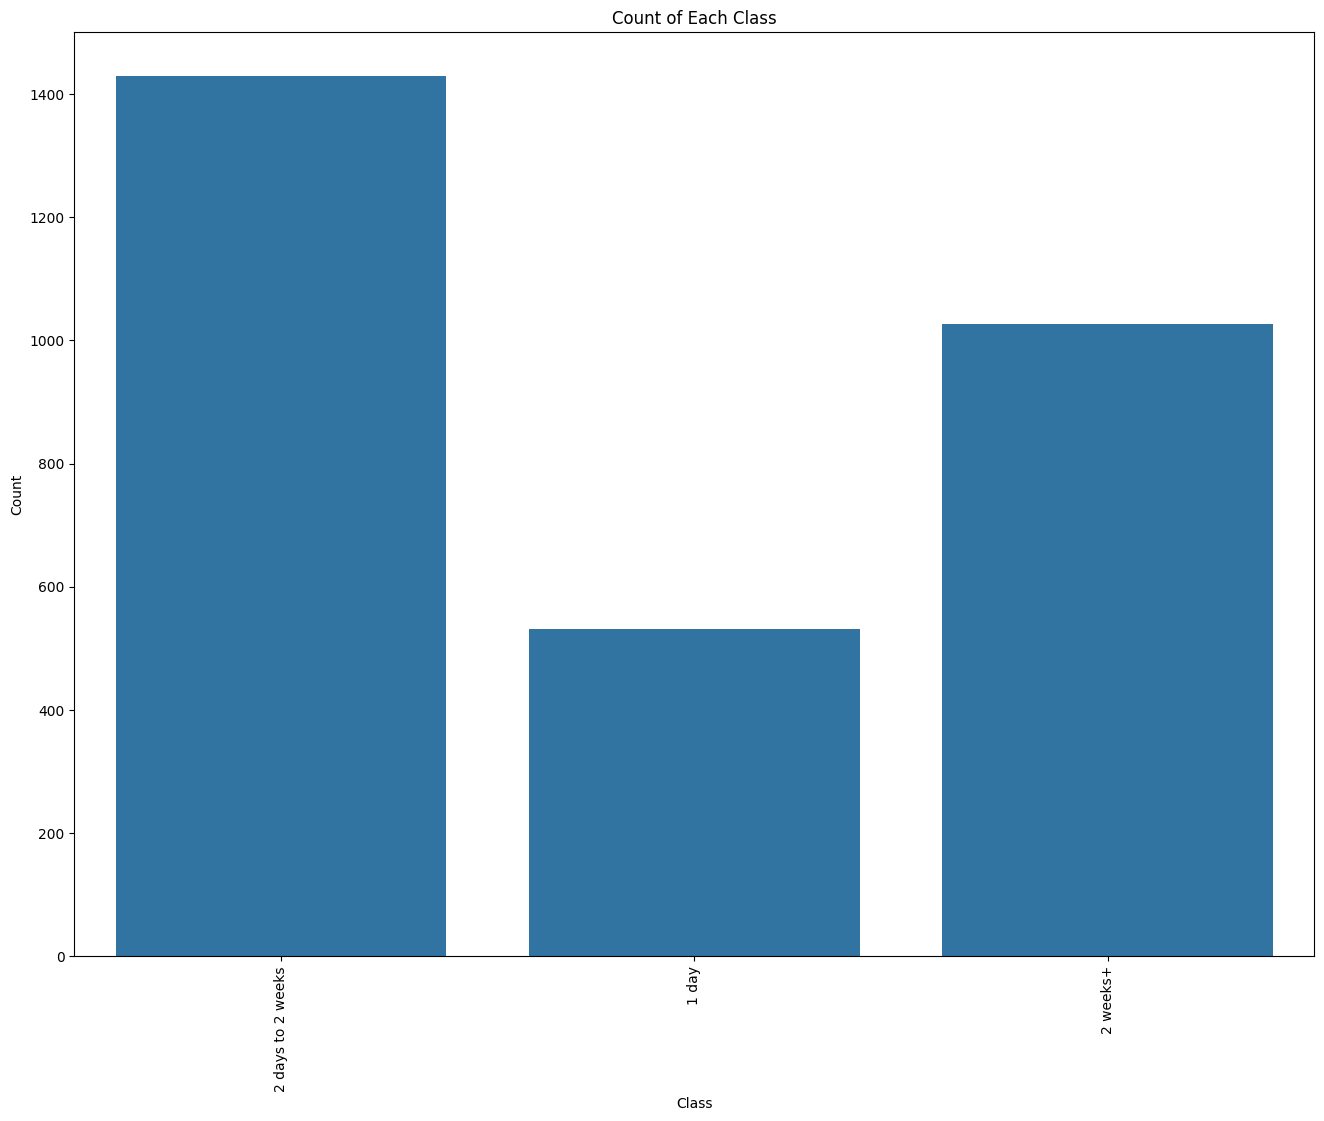

In [9]:
# Plot count of each class
plt.figure(figsize=(16, 12))
sns.countplot(data=df, x='Issue Lifetime')
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

### Distribution of Lifetime (hours)

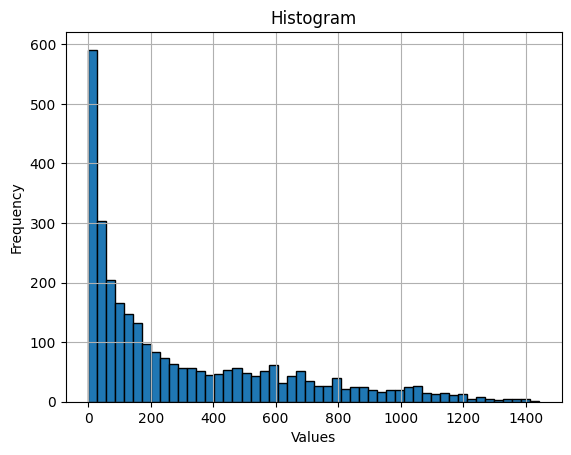

In [10]:
# Create histogram
plt.hist(df['Issue Lifetime (hours)'], bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Preprocessing

## Calculate social network metrics function

In [11]:
import networkx as nx

def get_social_network_metrics(comment_body_list, comment_author_list):
    G = nx.DiGraph()
    for i in range(len(comment_author_list) - 1):
        G.add_edge(comment_author_list[i+1], comment_author_list[i])

    # wordiness
    sum_of_lengths = sum(len(s) for s in comment_body_list )
    wordiness = int(sum_of_lengths / len(comment_body_list))

    # degree of centrality
    centrality = nx.degree_centrality(G)
    average_degree_centrality = sum(centrality.values()) / len(centrality)

    # closeness
    closeness = nx.closeness_centrality(G)
    average_closeness = sum(closeness.values()) / len(closeness)

    # betweenes
    betweenness = nx.betweenness_centrality(G)
    average_betweenness = sum(betweenness.values()) / len(betweenness)

    # density
    density = nx.density(G)

    # edges
    edges = nx.number_of_edges(G)

    # number of discussants
    num_discussants = len(set(comment_author_list))

    return wordiness, average_degree_centrality, average_closeness, average_betweenness, density, edges, num_discussants

### Clean text function

In [12]:
def split_text(text, separator):
    if separator in text:
        # Split the string into substrings based on the separator
        substrings = text.split(separator)

        # Extract the substrings before the separator
        substrings_before_separator = substrings[:-1]
    else:
        substrings_before_separator = [text]

    return substrings_before_separator

### Add Social network metrics to the df

In [13]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation

download('punkt', quiet=True)
download('stopwords', quiet=True)
download('wordnet', quiet=True)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text: str) -> str:
    processed_text = text.translate(str.maketrans('', '', punctuation)).lower()  # Strip punctuation and make lowercase
    tokens = word_tokenize(processed_text)  # Split text into tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words (e.g. 'the')
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words (e.g. 'running' -> 'run')
    return ' '.join(tokens)

processed_df = df.copy()

# Drop rows where either 'author' or 'Issue Body' are NaN
processed_df.dropna(subset=['author', 'Issue Body'], inplace=True)

# Fill NaN values in 'Comment Bodies' and 'Comment Authors' with empty string
processed_df[['Comment Bodies', 'Comment Authors']] = processed_df[['Comment Bodies', 'Comment Authors']].fillna('')
# Preprocess strings, not numeric types
for index, row in processed_df.iterrows():
    comment_bodies = row['Issue Body'] + '|SEPARATOR|' + row['Comment Bodies']
    comment_authors = str (row['author']) + '|SEPARATOR|' + str(row['Comment Authors']) + '|SEPARATOR|'

    comment_body_list = split_text(comment_bodies, '|SEPARATOR|')

    comment_authors_list = split_text(comment_authors, '|SEPARATOR|')

    for i in range(len(comment_body_list)):
        comment_body_list[i] = preprocess(comment_body_list[i])

    wordiness, centrality, closeness, betweenness, density, edges, num_discussants = get_social_network_metrics(comment_body_list, comment_authors_list)

    processed_df.loc[index, 'Wordiness'] = wordiness
    processed_df.loc[index, 'Centrality'] = centrality
    processed_df.loc[index, 'Closeness'] = closeness
    processed_df.loc[index, 'Betweenness'] = betweenness
    processed_df.loc[index, 'Density'] = density
    processed_df.loc[index, 'Number of Edges'] =  edges
    processed_df.loc[index, 'Number of Discussants'] = num_discussants

columns_to_drop = ['Repository', 'Open Date', 'Closed Date', 'Issue Title', 'Issue Body', 'Comment Bodies', 'Comment Authors', 'Labels', 'PR Merge Date', 'PR Number']
processed_df.drop(columns=columns_to_drop, axis=1, inplace=True)
processed_df.to_csv('sna_issue_data.csv')
processed_df.tail()

,author,Number of Comments,Issue Lifetime (hours),Issue Lifetime,Issue Text,Clean Text,00,01,02,03,...,zero,zindex,zoom,Wordiness,Centrality,Closeness,Betweenness,Density,Number of Edges,Number of Discussants
2981,chandujstchandu,10,771,2 weeks+,Tests pass without requiring default case - A...,tests pass without requiring default case addi...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,130.0,0.321429,0.269313,0.139881,0.160714,9.0,8.0
2982,dogweather,7,88,2 days to 2 weeks,Filter: Rewrite double negative Challenge [Fil...,filter rewrite double negative challenge filte...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,133.0,0.466667,0.340769,0.133333,0.233333,7.0,6.0
2983,P1xt,1,173,2 days to 2 weeks,Cancel doesn't work on Bug report modal <!-- F...,cancel doesnt work on bug report modal challen...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,334.0,1.000000,0.500000,0.000000,0.500000,1.0,2.0
2984,QuincyLarson,19,626,2 weeks+,"Toast with ""Submit"" button should not go away ...",toast with submit button should not go away un...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,225.0,0.476190,0.381784,0.104762,0.238095,10.0,7.0
2985,QuincyLarson,5,649,2 weeks+,Full screen map view should not scroll indepen...,full screen map view should not scroll indepen...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,171.0,0.500000,0.345556,0.133333,0.250000,5.0,5.0


In [14]:
authors = {}

for index, row in processed_df.iterrows():
    curr_author = row['author'].iloc[0]

    if curr_author in authors:
        authors[curr_author][0] += 1
        authors[curr_author][1] += row['Issue Lifetime (hours)']

    else:
        authors[curr_author] = [0, 0]
        authors[curr_author][0] = 1
        authors[curr_author][1] = row['Issue Lifetime (hours)']

for index, row in processed_df.iterrows():
    curr_author = row['author'].iloc[0]
    processed_df.loc[index, '# Merged Issues by Author'] = authors[curr_author][0]
    processed_df.loc[index, 'Average Author Lifetime'] = authors[curr_author][1] / authors[curr_author][0]

processed_df.head()

,author,Number of Comments,Issue Lifetime (hours),Issue Lifetime,Issue Text,Clean Text,00,01,02,03,...,zoom,Wordiness,Centrality,Closeness,Betweenness,Density,Number of Edges,Number of Discussants,# Merged Issues by Author,Average Author Lifetime
0,CoolHandLouis,3,81,2 days to 2 weeks,"Enhancement Request: For MacOS, add text that ...",enhancement request for macos add text that sa...,0.0,0.0,0.0,0.0,...,0.0,412.0,0.500000,0.319444,0.166667,0.250000,3.0,4.0,1.0,81.000000
1,friendlyseal,1,5,1 day,Typo on Step 61 of Sudoku Solver project in Sc...,typo on step 61 of sudoku solver project in sc...,0.0,0.0,0.0,0.0,...,0.0,459.0,1.000000,0.500000,0.000000,0.500000,1.0,2.0,1.0,5.000000
2,huyenltnguyen,1,4,1 day,[The Odin Project] Typo in Working With Text Q...,the odin project typo in working with text que...,0.0,0.0,0.0,0.0,...,0.0,502.0,1.000000,0.500000,0.000000,0.500000,1.0,2.0,62.0,306.612903
3,ahmaxed,5,135,2 days to 2 weeks,Google Pay displays wrong amount ### Describe ...,google pay displays wrong amount describe the ...,0.0,0.0,0.0,0.0,...,0.0,333.0,0.833333,0.427778,0.125000,0.416667,5.0,4.0,57.0,335.859649
4,samGreer,6,120,2 days to 2 weeks,Unclear instruction: Learn String Manipulation...,unclear instruction learn string manipulation ...,0.0,0.0,0.0,0.0,...,0.0,246.0,0.600000,0.432500,0.250000,0.300000,6.0,5.0,1.0,120.000000


In [15]:
sum = 0
num_authors = 0
lifetime_list = []
for key, value in authors.items():
    sum += value[1]
    num_authors += 1
    lifetime_list.append(value[1])
average = sum / num_authors
print("average: ", average)

average:  894.816683831102


In [16]:
# Drop the second 'author' column using its index (1)
processed_df = processed_df.drop(processed_df['author'], axis=1)

processed_df.head()

,Number of Comments,Issue Lifetime (hours),Issue Lifetime,Issue Text,Clean Text,00,01,02,03,04,...,zoom,Wordiness,Centrality,Closeness,Betweenness,Density,Number of Edges,Number of Discussants,# Merged Issues by Author,Average Author Lifetime
0,3,81,2 days to 2 weeks,"Enhancement Request: For MacOS, add text that ...",enhancement request for macos add text that sa...,0.0,0.0,0.0,0.0,0.0,...,0.0,412.0,0.500000,0.319444,0.166667,0.250000,3.0,4.0,1.0,81.000000
1,1,5,1 day,Typo on Step 61 of Sudoku Solver project in Sc...,typo on step 61 of sudoku solver project in sc...,0.0,0.0,0.0,0.0,0.0,...,0.0,459.0,1.000000,0.500000,0.000000,0.500000,1.0,2.0,1.0,5.000000
2,1,4,1 day,[The Odin Project] Typo in Working With Text Q...,the odin project typo in working with text que...,0.0,0.0,0.0,0.0,0.0,...,0.0,502.0,1.000000,0.500000,0.000000,0.500000,1.0,2.0,62.0,306.612903
3,5,135,2 days to 2 weeks,Google Pay displays wrong amount ### Describe ...,google pay displays wrong amount describe the ...,0.0,0.0,0.0,0.0,0.0,...,0.0,333.0,0.833333,0.427778,0.125000,0.416667,5.0,4.0,57.0,335.859649
4,6,120,2 days to 2 weeks,Unclear instruction: Learn String Manipulation...,unclear instruction learn string manipulation ...,0.0,0.0,0.0,0.0,0.0,...,0.0,246.0,0.600000,0.432500,0.250000,0.300000,6.0,5.0,1.0,120.000000


### Normalize values

In [17]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Number of Comments', 'Wordiness', 'Centrality', 'Closeness', 'Betweenness', 'Density', 'Number of Edges', 'Number of Discussants', 'Average Author Lifetime']

standard_scaler = StandardScaler()

processed_df[numerical_columns] = standard_scaler.fit_transform(processed_df[numerical_columns])

processed_df.shape

(2902, 4597)

In [18]:
#drop the issue text column and the cleaned text column
processed_df = processed_df.drop(columns=['Issue Text', 'Clean Text'])

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

columns_to_drop = ['Issue Lifetime (hours)', 'Issue Lifetime']
X = processed_df.drop(columns=columns_to_drop, axis=1)
y = processed_df['Issue Lifetime']

# Apply SMOTE to balance the classes
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

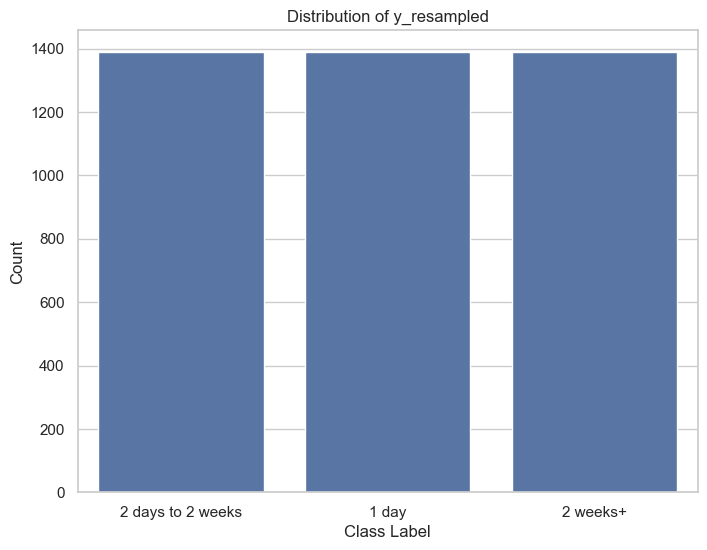

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_resampled is a numpy array
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribution of y_resampled')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

# Classification

### Data Split

In [21]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['Issue Lifetime (hours)', 'Issue Lifetime']
X = processed_df.drop(columns=columns_to_drop, axis=1)
y = processed_df['Issue Lifetime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

Cross-Validation Accuracy Scores: [0.63870968 0.59913793 0.58836207 0.61637931 0.61422414]
Mean CV Accuracy: 0.6113626251390434
Test Set Accuracy: 0.5972461273666093


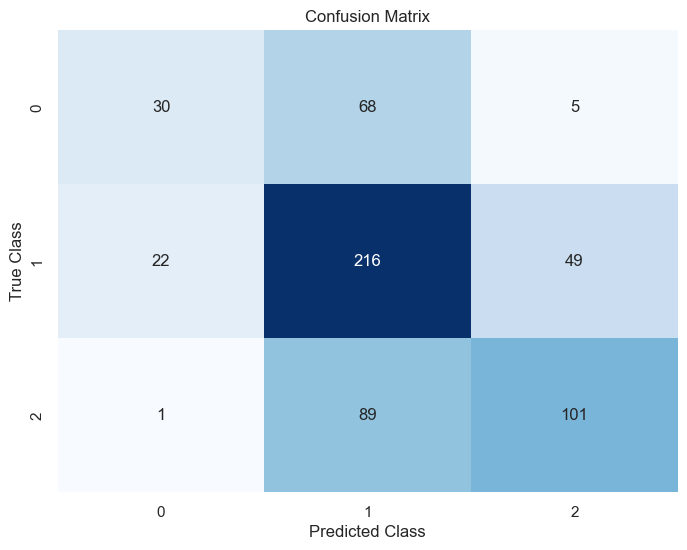

Classification Report:
                   precision    recall  f1-score   support

            1 day       0.57      0.29      0.38       103
2 days to 2 weeks       0.58      0.75      0.65       287
         2 weeks+       0.65      0.53      0.58       191

         accuracy                           0.60       581
        macro avg       0.60      0.52      0.54       581
     weighted avg       0.60      0.60      0.58       581



In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Perform k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validation scores
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

### Decision Tree

Cross-Validation Accuracy Scores: [0.66666667 0.62931034 0.71551724 0.62931034 0.64655172]
Mean CV Accuracy: 0.6574712643678161
Test Set Accuracy: 0.6540447504302926


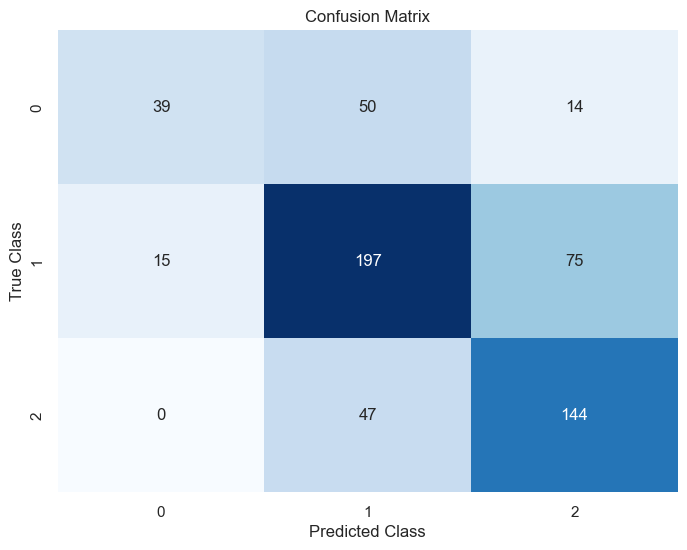

Classification Report:
                   precision    recall  f1-score   support

            1 day       0.72      0.38      0.50       103
2 days to 2 weeks       0.67      0.69      0.68       287
         2 weeks+       0.62      0.75      0.68       191

         accuracy                           0.65       581
        macro avg       0.67      0.61      0.62       581
     weighted avg       0.66      0.65      0.65       581



In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# Perform k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validation scores
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

### K nearest neighbors

Cross-Validation Accuracy Scores: [0.59784946 0.56896552 0.6012931  0.58189655 0.58405172]
Mean CV Accuracy: 0.586811271783463
Accuracy: 0.6299483648881239


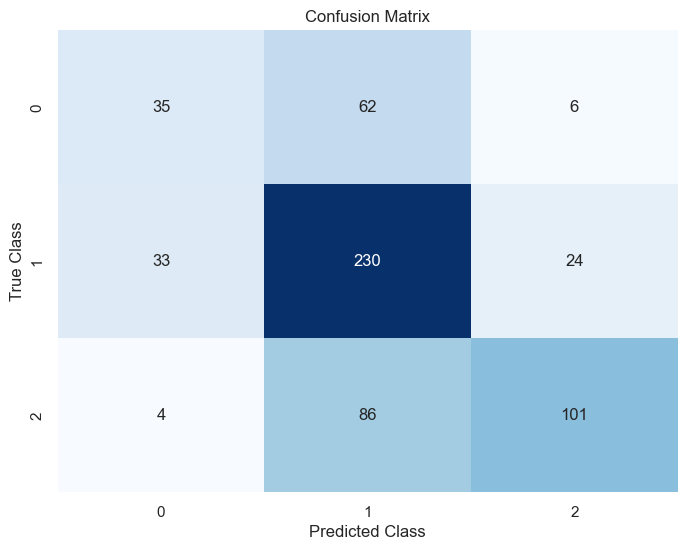

Classification Report:
                   precision    recall  f1-score   support

            1 day       0.49      0.34      0.40       103
2 days to 2 weeks       0.61      0.80      0.69       287
         2 weeks+       0.77      0.53      0.63       191

         accuracy                           0.63       581
        macro avg       0.62      0.56      0.57       581
     weighted avg       0.64      0.63      0.62       581



In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(1, 21)}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validation scores
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Create GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter
best_k = grid_search.best_params_['n_neighbors']

# Create a KNN classifier with the best k
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model with the best k to the training data
best_knn_classifier.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)